In [1]:
%matplotlib inline


# Drawing a rectangle on a map

This example will demonstrate how to draw a rectangle on a map using :meth:`~sunpy.map.GenericMap.draw_quadrangle`.


In [2]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.data.sample
import sunpy.map
import sunpy

Let's start with a sample AIA image.



In [3]:
aia_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

Here are four different ways to draw a rectangle. The first three ways
directly calls the `~astropy.coordinates.SkyCoord` class. The fourth way
converts pixel coordinates to the equivalent `~astropy.coordinates.SkyCoord`
objects using the :meth:`~sunpy.map.GenericMap.pixel_to_world`.



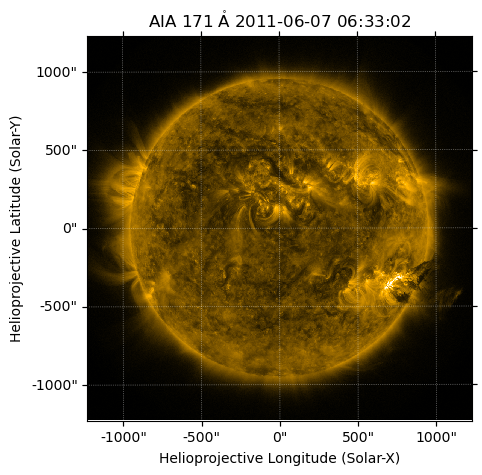

In [4]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)

In [34]:
type(fig)

matplotlib.figure.Figure

Specify two opposite corners of the rectangle as a single, two-element
SkyCoord object.



In [28]:
coords = SkyCoord(
    Tx=(100, 500) * u.arcsec,
    Ty=(200, 500) * u.arcsec,
    frame=aia_map.coordinate_frame,
)
aia_map.draw_quadrangle(
    coords,
    axes=ax,
    edgecolor="blue",
    linestyle="-",
    linewidth=2,
    label='2-element SkyCoord'
)

Specify two opposite corners of the rectangle as separate SkyCoord objects.



In [29]:
bottom_left = SkyCoord(-500 * u.arcsec, 200 * u.arcsec, frame=aia_map.coordinate_frame)
top_right = SkyCoord(-100 * u.arcsec, 500 * u.arcsec, frame=aia_map.coordinate_frame)
aia_map.draw_quadrangle(
    bottom_left=bottom_left,
    axes=ax,
    top_right=top_right,
    edgecolor="green",
    linestyle="--",
    linewidth=2,
    label='two SkyCoords'
)

Specify one corner of the rectangle and the rectangle's width and height.



In [30]:
bottom_left = SkyCoord(-500 * u.arcsec, -500 * u.arcsec, frame=aia_map.coordinate_frame)
width = 400 * u.arcsec
height = 300 * u.arcsec
aia_map.draw_quadrangle(
    bottom_left,
    axes=ax,
    width=width,
    height=height,
    edgecolor="yellow",
    linestyle="-.",
    linewidth=2,
    label='width/height'
)

Draw a desired rectangle in pixel coordinates by first converting to SkyCoord objects.



In [7]:
bottom_left = aia_map.pixel_to_world(60 * u.pixel, 350 * u.pixel)
top_right = aia_map.pixel_to_world(800 * u.pixel, 450 * u.pixel)
aia_map.draw_quadrangle(
    bottom_left,
    axes=ax,
    top_right=top_right,
    edgecolor="red",
    linestyle=":",
    linewidth=2,
    label='pixel_to_world()'
)
ax.legend()

plt.show()

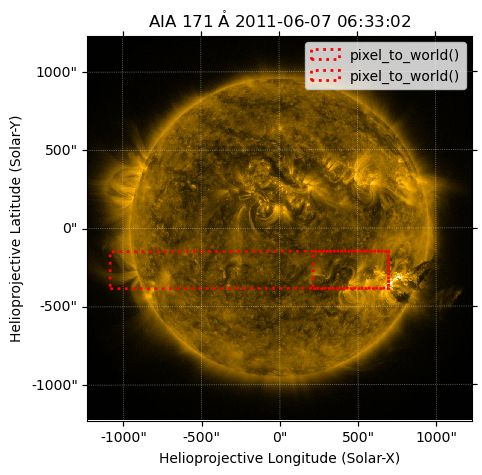

In [8]:
fig

In [14]:
214/3600 

0.059444444444444446